<h1> Python Basic Plotting Tutorial <h1>

In [1]:
%matplotlib inline    
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns   
from sklearn import datasets 
sns.set()  # required as of seaborn 0.8.0, it sets the visual style of graphs

In [2]:
#We first load the iris dataset
iris=datasets.load_iris()

#iris_data is a numpy array of the form 
"""
sl = sepal length
sw = sepal width
pl = petal length
pw = petal width
[
  [sl_1,sw_1,pl_1,pw_1],
  [sl_2,sw_2,pl_2,pw_2],
  [sl_3,sw_3,pl_3,pw_3],
  ...
]

"""
iris_data=iris.data 

#numpy arrays can be `sliced` in various ways:
#  1. array[:,0] indicates that we want to retrieve all rows from the array but in each row we only want the first column.
#  2. array[0,:] indicates that we want only the first row (in this case the zeroth row) and all the columns in that row.
#  3. ex: arr=[[1,2],[3,4]]   arr[:,0] would return [1,3] , arr[0,:] would return [1,2], arr[0,0] would return 1 
#     which is the element in the 0th row and 0th column.

sepal_length=iris_data[:,0]        
sepal_width=iris_data[:,1]
petal_length=iris_data[:,2]
petal_width=iris_data[:,3]
flower_types=iris.target

#Another simple way to slice numpy arrays is as follows:
a=np.array([-1,-2,-3,-1])
indices=np.where(a==-1)
b=np.array([1,2,3,4])
print("Array a",a)
print("Array b",b)
print("Indices where array A has value -1",indices)
print("Print the same indices from array b",b[indices])

#This simple concept is going to be used by us to plot the sepal length vs. sepal width of each type of flower

('Array a', array([-1, -2, -3, -1]))
('Array b', array([1, 2, 3, 4]))
('Indices where array A has value -1', (array([0, 3], dtype=int64),))
('Print the same indices from array b', array([1, 4]))


<h1> Scatter Plot </h1>
<h3><ul> 
  <li> We use scatter plots to uncover relationships between variables being plotted.</li>
  <br>
  <li> For Example: We plot sepal_length and sepal_width for all the flowers. </li>
</ul> </h3>

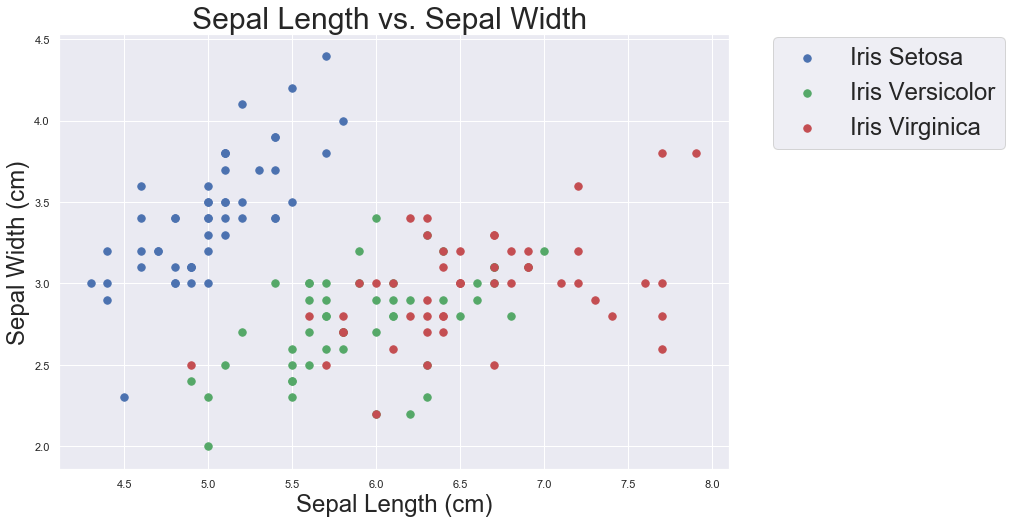

In [3]:
fig,ax=plt.subplots(figsize=(12,8))
colors=['b','g','r']  #create a simple colors list with 3 colors blue,green,red indicated by 'b','g','r' respectively. 
for i in range(3): #since there are 3 types of flowers in our dataset
    indices=np.where(flower_types==i)
    ax.scatter(sepal_length[indices],sepal_width[indices],s=55,c=colors[i])   #basic scatter plot with sepal_length as x-axis and sepal_width as y-axis.

#title,axis labels and legend
plt.title("Sepal Length vs. Sepal Width ",fontsize=30)
plt.xlabel("Sepal Length (cm)",fontsize=24)
plt.ylabel("Sepal Width (cm)",fontsize=24)
ax.legend(['Iris Setosa','Iris Versicolor','Iris Virginica'],loc='upper right',fontsize=24,bbox_to_anchor=(0.43, 0.92, 1., .102),mode="tight")

<ul>
<li> This plot shows us how the sepal length and sepal width characteristics of Iris Sertosa are very different from that of Iris Versicolor and Iris Virginica.</li>
<br>
<li>We can also see that Iris Sertosa on average tends to have a relatively shorter sepal length and relatively wider sepal width in comparison to the other two types of flowers.
</li>
<br>
<li>
   Similarly we see that Iris Sertosa flowers have relatively longer sepal lengths than the other two types of flowers. 
</li>
</ul>

<h1> Histogram </h1>
<ul>
<li> Historgrams are useful to look at the distribution of a particular variable across a dataset. </li>
<li>In our iris dataset above, let's try to visualize the sepal widths as a histogram, this would help us to glean certain informative statistics about the sepal widths across the datasets and later about the sepal widths of each class.</li>
</ul>

Text(0,0.5,'Number of Occurrences')

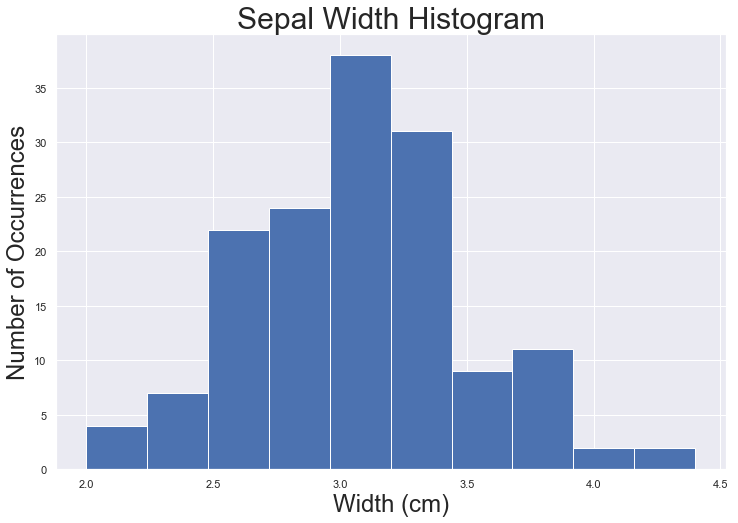

In [4]:
fig,ax=plt.subplots(figsize=(12,8))
ax.hist(sepal_width,bins=10) #bins are what make the histogram decide how to divide the continuous interval 
                             #of the values into discrete buckets so the number of bins can change the look 
                             #of the plot.

        
#title,axis labels and legend
plt.title("Sepal Width Histogram",fontsize=30)
plt.xlabel("Width (cm)",fontsize=24)
plt.ylabel("Number of Occurrences",fontsize=24)
#plt.grid(True)

<ul>
<li> We observe that the average sepal width is about 3.0 and the value varies between 2.0 to 4.25 </li>
<li> To get a better idea, let's color the histograms by type and use a visualization called a `Stacked Histogram`</li> 
</ul>

[array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3]), array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2,
       2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. ,
       2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. ,
       2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8]), array([3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. ,
       2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2,
       2.8, 3. , 2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. ,
       3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])]


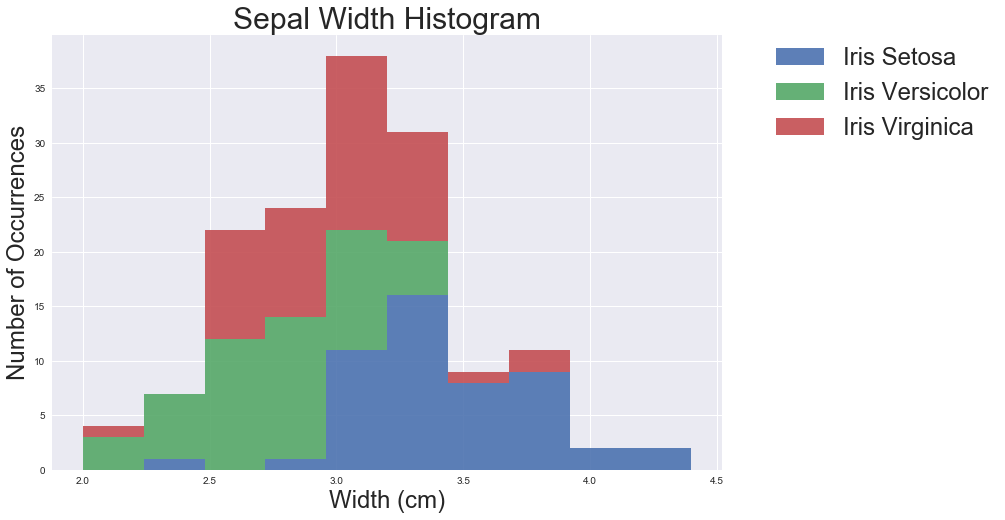

In [7]:
fig,ax=plt.subplots(figsize=(12,8))
tmp=list()
for i in range(3):
    indices=np.where(flower_types==i)
    tmp.append(sepal_width[indices])

ax.hist(tmp,bins=10,stacked=True,alpha=0.9)    
#title,axis labels and legend
plt.title("Sepal Width Histogram",fontsize=30)
plt.xlabel("Width (cm)",fontsize=24)
plt.ylabel("Number of Occurrences",fontsize=24)
ax.legend(['Iris Setosa','Iris Versicolor','Iris Virginica'],loc='upper right',fontsize=24)
ax.legend(['Iris Setosa','Iris Versicolor','Iris Virginica'],loc='upper right',fontsize=24,bbox_to_anchor=(0.43, 0.92, 1., .102),mode="tight")

<ul>
<li>Here we observe something slightly different, we see that the mean values for sepal width for Iris Versicolor and Iris Virginica are indeed 3.0 but that the mean value for sepal width of Iris Setosa is 3.25 which is consistent with our earlier observation of this phenomenon from the scatter plot. </li>
<br>
<li>
Notice that by using a stacked histogram like this one, we are able to get a really good idea about how the distribution of sepal widths of each of the three classes varies relative to each other. This understanding of relative variation of a particular property is pretty important if you want to try to "distinguish" between types of flowers based on the Sepal Width property.
</li>
</ul>

<h2> Line Graphs <h2>
<ul>
<li>
 Line graphs are usually used to showcases how a particular variable changes over time.
</li>
</ul>

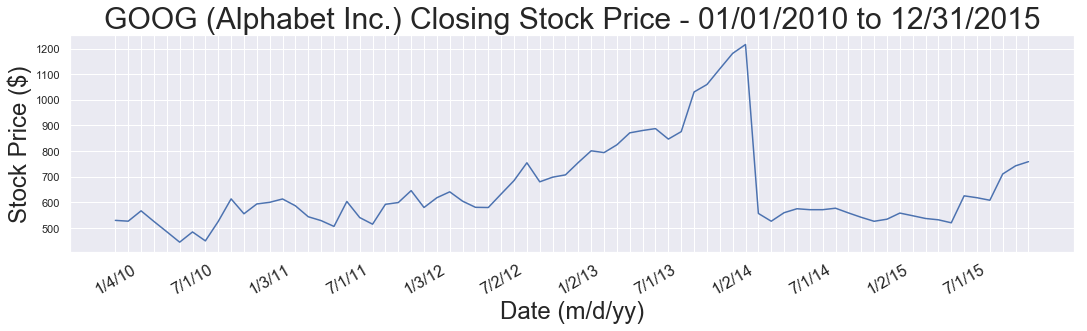

In [6]:
dates=['1/4/10', '2/1/10', '3/1/10', '4/1/10', '5/3/10', '6/1/10', '7/1/10', '8/2/10', '9/1/10', '10/1/10', '11/1/10', '12/1/10', '1/3/11', '2/1/11', '3/1/11', '4/1/11', '5/2/11', '6/1/11', '7/1/11', '8/1/11', '9/1/11', '10/3/11', '11/1/11', '12/1/11', '1/3/12', '2/1/12', '3/1/12', '4/2/12', '5/1/12', '6/1/12', '7/2/12', '8/1/12', '9/4/12', '10/1/12', '11/1/12', '12/3/12', '1/2/13', '2/1/13', '3/1/13', '4/1/13', '5/1/13', '6/3/13', '7/1/13', '8/1/13', '9/3/13', '10/1/13', '11/1/13', '12/2/13', '1/2/14', '2/3/14', '3/3/14', '4/1/14', '5/1/14', '6/2/14', '7/1/14', '8/1/14', '9/2/14', '10/1/14', '11/3/14', '12/1/14', '1/2/15', '2/2/15', '3/2/15', '4/1/15', '5/1/15', '6/1/15', '7/1/15', '8/3/15', '9/1/15', '10/1/15', '11/2/15', '12/1/15']
closing_stock_prices=[529.940918, 526.800903, 567.120972, 525.700867, 485.630829, 444.950775, 484.85083, 450.020752, 525.790955, 613.70105, 555.710938, 593.971008, 600.361023, 613.401062, 586.761047, 544.100891, 529.020874, 506.380859, 603.69104, 540.960938, 515.040894, 592.641052, 599.391052, 645.901123, 580.111023, 618.251038, 641.241089, 604.851074, 580.860962, 580.070984, 632.971069, 685.091125, 754.501282, 680.301147, 698.371155, 707.381226, 755.691284, 801.201355, 794.191345, 824.571411, 871.221497, 880.37146, 887.751526, 846.901489, 875.911499, 1030.581787, 1059.591797, 1120.711914, 1180.972046, 1215.6521, 556.972473, 526.662415, 559.892578, 575.282593, 571.6026, 571.6026, 577.36261, 559.08252, 541.832458, 526.402405, 534.522461, 558.402527, 548.002441, 537.340027, 532.109985, 520.51001, 625.609985, 618.25, 608.419983, 710.809998, 742.599976, 758.880005]

fig,ax=plt.subplots(figsize=(18,4))
ax.plot([i for i in range(len(dates))],closing_stock_prices)
plt.title("GOOG (Alphabet Inc.) Closing Stock Price - 01/01/2010 to 12/31/2015",fontsize=30)
plt.ylabel("Stock Price ($)",fontsize=24)
plt.xlabel("Date (m/d/yy)",fontsize=24)
_=plt.xticks([i for i in range(len(dates))],dates,rotation=30,fontsize=16)

for idx,label in enumerate(ax.get_xticklabels()):
    if idx%6==0:
        label.set_visible(True)
    else:
        label.set_visible(False)

<h2> Data Distributions </h2>
<h3>
   We will talk about a popular distribution that data analysts encounter, called the Gaussian Distribution (a.k.a Normal Distribution)
</h3>

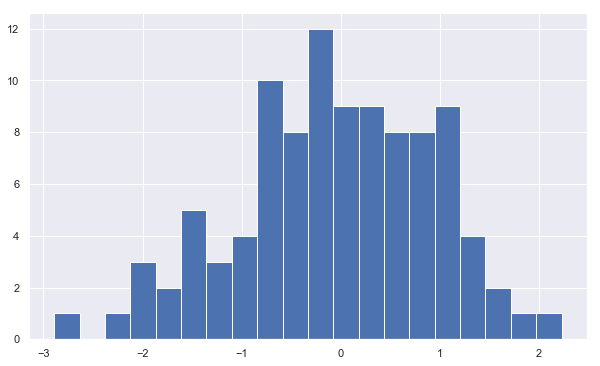

In [7]:
#We first generate a random list sampled from a Normal Distribution using numpy.
# loc indicates the mean and scale indicates the st.dev of the distribution.
gaussian_sample_values=np.random.normal(loc=0,scale=1.0,size=100)
plt.figure(figsize=(10,6))
_=plt.hist(gaussian_sample_values,bins=20)